In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df['arrival_date_year'].min(),df['arrival_date_year'].max()

(2017, 2019)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df1 = df.copy()

In [6]:
categorical = []
numerical = []

for i in df1.columns:
    if df1[i].dtypes == 'object':
        categorical.append(i)
    else : 
        numerical.append(i)

In [7]:
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_weekdays_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [8]:
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'city',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'reservation_status']

# Data Preprocessing

## Handling Missing Value

In [9]:
#Checking Missing Values
df1.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [10]:
num_miss_val = ['company','agent','children']
df1[num_miss_val].describe()

,company,agent,children
count,6797.000000,103050.000000,119386.000000
mean,189.266735,86.693382,0.103890
std,131.655015,110.774548,0.398561
min,6.000000,1.000000,0.000000
25%,62.000000,9.000000,0.000000
50%,179.000000,14.000000,0.000000
75%,270.000000,229.000000,0.000000
max,543.000000,535.000000,10.000000


In [11]:
df1['city'].describe()

count            118902
unique              177
top       Kota Denpasar
freq              48590
Name: city, dtype: object

In [12]:
data_missing_value = df1.isnull().sum().reset_index()
data_missing_value.columns = ['feature','jumlah_missing_value']
data_missing_value['percentage'] = round(((data_missing_value['jumlah_missing_value']/len(df1))*100),3)
data_missing_value = data_missing_value.sort_values('percentage',ascending = False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,jumlah_missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,city,488,0.409
3,children,4,0.003


Ditemukan 4 kolom yang memiliki missing values:

*   company
*   agent
*   city
*   children

Treatment:

*   Kolom `children` akan diisi dengan `0` karena mengindikasikan tamu tidak membawa anak-anak.
*   Kolom `agent` akan diisi dengan `0` karena mengindikasikan tamu melakukan reservasi tidak melalui agent.
*   Kolom `company` akan diisi dengan `0` karena mengindikasikan tamu tidak berasal dari company.
*   Kolom `city` akan diisi dengan `Unknown` karena kota tidak diketahui secara pasti.

In [13]:
# Mengisi null values
df1['children'].fillna(0, inplace = True)
df1['agent'].fillna(0, inplace = True) 
df1['company'].fillna(0, inplace = True)
df1['city'].fillna('Unknown', inplace = True)

In [14]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

<b> Terlihat bahwa sudah tidak ada missing value pada data

## Cek Data Duplikat

In [15]:
df1.duplicated().sum()

33261

In [16]:
persentase = round(((df1.duplicated().sum()/len(df1))*100),3)
print('Persentase data duplikat : ', persentase, '%')

Persentase data duplikat :  27.859 %


Didapatkan ada 33.294 baris data yang duplikat. Karena pada dataset ini tidak ada kolom unique nya (seperti ID atau nama customer atau kolom yang bisa dijadikan pembeda antar baris), maka data duplikat yang ada tidak di drop. Keputusan ini dikarenakan data duplikat yang ditemukan, belum tentu benar-benar duplikat atau bisa jadi data yang sama tersebut berasal dari customer yang berbeda

## Merubah Tipe Data

In [17]:
# Mengganti tipe data kolom yang tidak sesuai
df1['children'] = df1['children'].astype('int64')

In [18]:
print('unique is_canceled :', df1['is_canceled'].unique())
print('unique is_repeated_guest :', df1['is_repeated_guest'].unique())

unique is_canceled : [0 1]
unique is_repeated_guest : [0 1]


Masing-masing kolom di atas memiliki dua nilai unique, dimana memiliki arti cancel atau tidak untuk kolom `is_canceled`, dan tamu berulang atau tidak untuk kolom `is_repeated_guest`. Nilai-nilai tersebut termasuk nilai kategori sehingga lebih baik tipe datanya diubah menjadi tipe kategorikal.

In [19]:
df1['is_canceled'] = df1['is_canceled'].astype('object')
df1['is_repeated_guest'] = df1['is_repeated_guest'].astype('object')

In [20]:
df1['agent'] = df1['agent'].astype('object') #karena merupakan ID dan tidak mungkin dilakukan operasi aritmatika sehingga tipe data diubah

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

## Mengganti Value yang Tidak Sesuai

In [22]:
categorical = []
numerical = []

for i in df1.columns:
    if df1[i].dtypes == 'object':
        categorical.append(i)
    else : 
        numerical.append(i)

In [23]:
for i in categorical:
    print(f'''Value Count Column {i}:''')
    print(df1[i].value_counts())
    print('----'*10, '\n')
    

Value Count Column hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
---------------------------------------- 

Value Count Column is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64
---------------------------------------- 

Value Count Column arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
---------------------------------------- 

Value Count Column meal:
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64
---------------------------------------- 

Value Count Column city:
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287


Berdasarkan hasil di atas didapatkan bahwa:</n>
- Terdapat value Undefined pada feature 'meal' dan 'distribution_channel'
- Pada feature 'meal', value Undefined akan diganti dengan No Meal
- Pada feature 'distribution_channel', value Undefined akan diganti dengan nilai modus pada feature ini.

In [24]:
# Mengganti value 'Undefined' menjadi 'No Meal'
df1['meal'] = df1['meal'].replace(['Undefined'], 'No Meal')

In [25]:
df1['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

## Membuang Data yang Tidak Diperlukan

### Total Guest

In [26]:
# Membuat feature baru untuk total pengunjung
df1['total_guest']= df1['adults'] + df1['children'] + df1['babies']

In [27]:
df1['total_guest'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55,  0, 20,  6, 10],
      dtype=int64)

In [28]:
# Menghitung total guest = 0
df1[['total_guest']][(df1['total_guest']==0)].count()

total_guest    180
dtype: int64

Terlihat bahwa ada 180 baris di kolom `total_guest` yang nilainya 0 (nol). Oleh karena itu data dengan total guest = 0 perlu di hapus karena tidak mungkin ada booking kamar hotel dengan total guestnya tidak ada atau 0.

In [29]:
# Menghapus data dengan total guest yang berjumlah 0
df1 = df1[df1['total_guest']>0]
df1.shape

(119210, 30)

### Adults

In [30]:
# Cek apakah ada baris yang value pada kolom adults 0, tetapi value pada kolom children dan babies > 0
df1[['adults','children','babies']][(df1['adults']==0)]

,adults,children,babies
40984,0,3,0
41048,0,2,0
41446,0,2,0
41952,0,2,0
45158,0,2,0
...,...,...,...
117204,0,2,0
117274,0,2,0
117303,0,2,0
117453,0,2,0


Terdapat 223 baris dengan jumlah tamu dewasa = 0, tetapi children dan babies > 0. Baris ini akan di drop karena tidak mungkin jumlah tamu hanya anak-anak dan bayi tanpa dewasa.

In [31]:
# Menghapus baris yang value pada kolom adults 0, tetapi value pada kolom children dan babies > 0
df1.drop(df1[(df1['adults']==0)].index, inplace = True)

In [32]:
df1.shape

(118987, 30)

### Stay Duration

In [33]:
# Membuat fitur baru 'stay_duration' untuk lama menginap
df1['stay_duration'] = df1['stays_in_weekend_nights'] + df1['stays_in_weekdays_nights']

In [34]:
df1['stay_duration'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12,
       18, 46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27,
       60, 69, 35, 45, 38, 24, 48, 34], dtype=int64)

In [35]:
# Menghitung stay duration = 0
df1[['stay_duration']][(df1['stay_duration']==0)].count()

stay_duration    645
dtype: int64

Terlihat bahwa ada 645 baris di kolom `stay_duration` yang nilainya 0 (nol). Oleh karena itu data dengan stay duration = 0 perlu di hapus karena tidak mungkin ada booking kamar hotel dengan stay duration/lama menginapnya tidak ada atau 0.

In [36]:
# Menghapus baris dengan kondisi 'stays_in_weekend_nights','stays_in_weekdays_nights' semuanya bernilai 0 
df1.drop(df1[(df1['stays_in_weekend_nights']==0)&(df1['stays_in_weekdays_nights']==0)].index, inplace = True)

In [37]:
df1.shape

(118342, 31)

In [38]:
categorical = []
numerical = []

for i in df1.columns:
    if df1[i].dtypes == 'object':
        categorical.append(i)
    else : 
        numerical.append(i)

In [39]:
df1[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,118342.0,104.467678,106.931140,0.00,18.0,70.0,161.0,709.0
arrival_date_year,118342.0,2018.157526,0.707972,2017.00,2018.0,2018.0,2019.0,2019.0
arrival_date_week_number,118342.0,27.157788,13.587016,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118342.0,15.797637,8.782347,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118342.0,0.932002,0.995617,0.00,0.0,1.0,2.0,19.0
stays_in_weekdays_nights,118342.0,2.512667,1.893914,0.00,1.0,2.0,3.0,50.0
adults,118342.0,1.863514,0.570285,1.00,2.0,2.0,2.0,55.0
children,118342.0,0.100564,0.390460,0.00,0.0,0.0,0.0,10.0
babies,118342.0,0.007952,0.097523,0.00,0.0,0.0,0.0,10.0
previous_cancellations,118342.0,0.087779,0.847953,0.00,0.0,0.0,0.0,26.0


Menghapus nilai adr yang bernilai negatif atau bernilai 0 karena adr (average daily rate) tidak mungkin bernilai negatif atau 0.

### Adr

In [40]:
df1[['adr']][(df1['adr']<0)].count()

adr    1
dtype: int64

In [41]:
# filter adr > 0
df1 = df1[df1['adr']>0]
df1.shape

(117182, 31)

# Monthly Booking Hotel Analysis Based on Hotel Type

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df2 = df1.copy()

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117182 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117182 non-null  object 
 1   is_canceled                     117182 non-null  object 
 2   lead_time                       117182 non-null  int64  
 3   arrival_date_year               117182 non-null  int64  
 4   arrival_date_month              117182 non-null  object 
 5   arrival_date_week_number        117182 non-null  int64  
 6   arrival_date_day_of_month       117182 non-null  int64  
 7   stays_in_weekend_nights         117182 non-null  int64  
 8   stays_in_weekdays_nights        117182 non-null  int64  
 9   adults                          117182 non-null  int64  
 10  children                        117182 non-null  int64  
 11  babies                          117182 non-null  int64  
 12  meal            

## Membuat Tabel Agregat

In [45]:
# Tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel 
df2_group = df2.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':['nunique','count']}).reset_index()
df2_group.columns = ['hotel','bulan_kedatangan','tahun_unique','total_booking']
df2_group
                        

,hotel,bulan_kedatangan,tahun_unique,total_booking
0,City Hotel,April,2,4855
1,City Hotel,August,2,7802
2,City Hotel,December,2,7451
3,City Hotel,February,2,3985
4,City Hotel,January,2,4254
5,City Hotel,July,2,8102
6,City Hotel,June,2,7384
7,City Hotel,March,2,3652
8,City Hotel,May,2,6348
9,City Hotel,November,2,7269


## Normalisasi data

Data pada bulan september dan oktober diambil selama 3 tahun. Sedangkan, untuk bulan selain september dan oktober data diambil hanya selama 2 tahun. Sehingga data perlu dinormalisasi agar perbandingannya sesuai.

In [46]:
# Membuat kolom 
df2_normal = df2_group.copy()
df2_normal['avg_total_booking'] = round(df2_normal['total_booking']/df2_normal['tahun_unique'])
df2_normal

,hotel,bulan_kedatangan,tahun_unique,total_booking,avg_total_booking
0,City Hotel,April,2,4855,2428.0
1,City Hotel,August,2,7802,3901.0
2,City Hotel,December,2,7451,3726.0
3,City Hotel,February,2,3985,1992.0
4,City Hotel,January,2,4254,2127.0
5,City Hotel,July,2,8102,4051.0
6,City Hotel,June,2,7384,3692.0
7,City Hotel,March,2,3652,1826.0
8,City Hotel,May,2,6348,3174.0
9,City Hotel,November,2,7269,3634.0


## Urutan Data Berdasarkan Bulan

In [47]:
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2_normal['bulan_kedatangan'] = pd.Categorical(df2_normal['bulan_kedatangan'], categories = ordered_months, ordered = True)

In [48]:
df2_normal_sorted = df2_normal.sort_values(['hotel','bulan_kedatangan']).reset_index()
df2_normal_sorted = df2_normal_sorted.drop('index', axis = 1)
df2_normal_sorted

,hotel,bulan_kedatangan,tahun_unique,total_booking,avg_total_booking
0,City Hotel,January,2,4254,2127.0
1,City Hotel,February,2,3985,1992.0
2,City Hotel,March,2,3652,1826.0
3,City Hotel,April,2,4855,2428.0
4,City Hotel,May,2,6348,3174.0
5,City Hotel,June,2,7384,3692.0
6,City Hotel,July,2,8102,4051.0
7,City Hotel,August,2,7802,3901.0
8,City Hotel,September,3,7945,2648.0
9,City Hotel,October,3,8828,2943.0


## Visualisasi Perubahan Kenaikan atau Penurunan Jumlah Pemesanan Hotel Setiap Bulan Berdasarkan Jenis Hotel

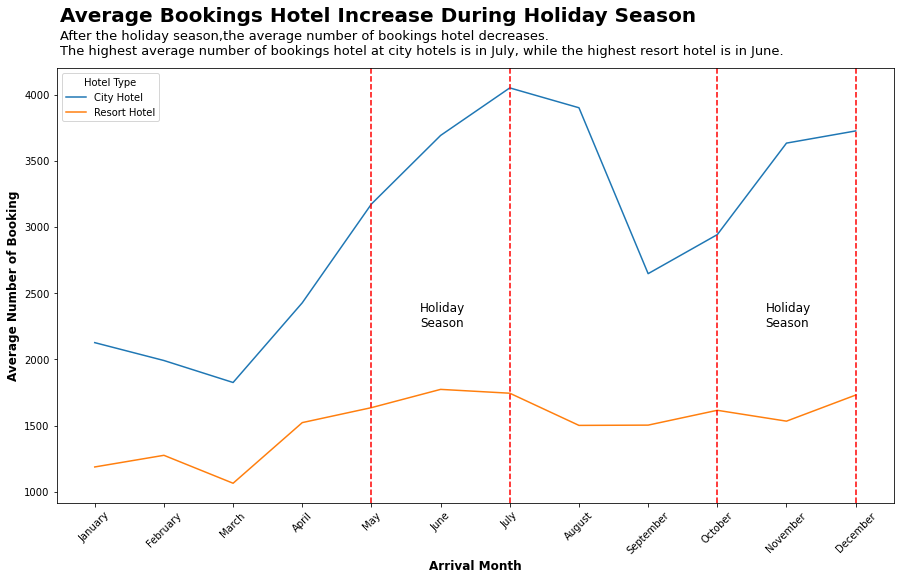

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize = (15,8))
sns.lineplot(data = df2_normal_sorted, x = 'bulan_kedatangan', y = 'avg_total_booking', hue = 'hotel')

# set title, caption, and legend
plt.text(x = -0.5, y = 4550, s = 'Average Bookings Hotel Increase During Holiday Season', fontsize = 20, fontweight = 'bold') 
plt.text(x = -0.5, y = 4300, s = 'After the holiday season,the average number of bookings hotel decreases.\n' 
         'The highest average number of bookings hotel at city hotels is in July, while the highest resort hotel is in June.', fontsize = 13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(title = 'Hotel Type')

# set label
plt.xlabel('Arrival Month',fontsize=12, fontweight = 'bold')
plt.ylabel('Average Number of Booking',fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45)

# set holiday season
plt.axvline(4, color='red', linestyle='--')
plt.axvline(6, color='red', linestyle='--')
plt.text(x=4.7,y=2250,s='Holiday\nSeason',fontsize=12)

#set holiday season
plt.axvline(9, color='red', linestyle='--')
plt.axvline(11, color='red', linestyle='--')
plt.text(x=9.7,y=2250,s='Holiday\nSeason',fontsize=12)

plt.show()
plt.tight_layout()
plt.savefig('Hotel Bookings.png', dpi = 200);



## Interpretasi Visualisasi

1. Pemesanan hotel rata-rata mengalami kenaikan pada musim liburan.
2. Kenaikan tertinggi ada pada musim liburan pada bulan Juni-Juli. Hal ini dikarenakan pada bulan tersebut bertepatan dengan moment libur lebaran dan juga libur sekolah. Pada City hotel, pesanan tertinggi ada pada bulan Juli. Sedangkan pada Resort hotel ada pada bulan Juni.
3. Pada akhir tahun, yaitu musim liburan pada bulan November-Desember, rata-rata pemesanan city hotel juga mengalami kenaikan tetapi tidak sebesar bulan Juni-Juli. Sedangkan untuk Resort hotel pada bulan November sempat mengalami penurunan.
4. Secara keseluruhan, City hotel lebih banyak di pesan daripada Resort Hotel.
5. Setelah musim liburan, rata-rata jumlah booking hotel menurun.

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [50]:
df3 = df1.copy()

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117182 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117182 non-null  object 
 1   is_canceled                     117182 non-null  object 
 2   lead_time                       117182 non-null  int64  
 3   arrival_date_year               117182 non-null  int64  
 4   arrival_date_month              117182 non-null  object 
 5   arrival_date_week_number        117182 non-null  int64  
 6   arrival_date_day_of_month       117182 non-null  int64  
 7   stays_in_weekend_nights         117182 non-null  int64  
 8   stays_in_weekdays_nights        117182 non-null  int64  
 9   adults                          117182 non-null  int64  
 10  children                        117182 non-null  int64  
 11  babies                          117182 non-null  int64  
 12  meal            

Dapat dilihat dari informasi di atas bahwa durasi menginap diwakilkan dengan kolom `stay_duration` yang sudah dibuat pada waktu data preprocessing

## Mengelompokkan nilai-nilai dari kolom `stay_duration`

In [52]:
df3['stay_duration'].value_counts()

2     27246
3     26876
1     20449
4     17255
7      8613
5      7731
6      3822
8      1145
10     1132
14      910
9       831
11      391
12      218
13      139
15       71
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
30       12
29       12
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
60        1
69        1
45        1
38        1
34        1
Name: stay_duration, dtype: int64

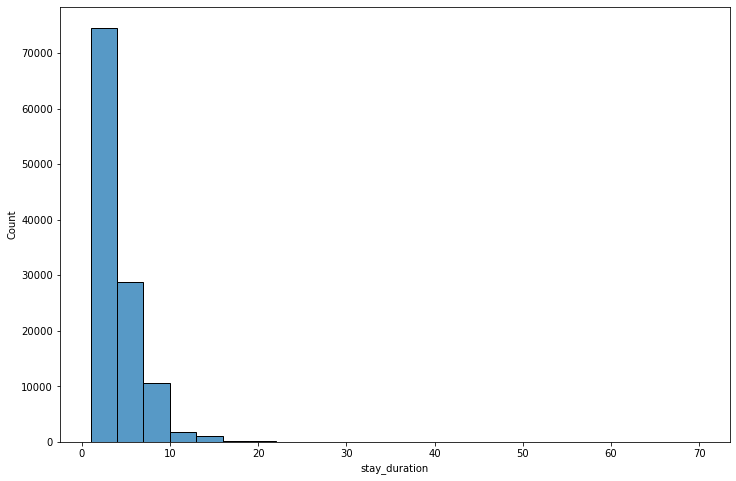

In [53]:
# Distribusi data stay_duration
plt.figure(figsize = (12,8))
sns.histplot(data = df3, x = 'stay_duration', binwidth = 3)
plt.show()

Dari plot di atas terlihat bahwa distribusi datanya skewed. Sehingga kita akan mengelompokkan value pada kolom `stay_duration` dimana jika nilainya lebih dari 14 akan dikelompokkan menjadi 15

In [54]:
df3['stay_duration']=np.where(df3['stay_duration']>14,15,df3['stay_duration'])

In [55]:
df3['stay_duration'].value_counts()

2     27246
3     26876
1     20449
4     17255
7      8613
5      7731
6      3822
8      1145
10     1132
14      910
9       831
15      424
11      391
12      218
13      139
Name: stay_duration, dtype: int64

## Perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel

In [56]:
df3_gb = df3.groupby(['hotel','is_canceled','stay_duration']).agg({'stay_duration': 'count'}).rename(columns={'stay_duration':'total_booking'})
df3_gb_pivot = pd.pivot_table(df3_gb,index=['hotel','stay_duration'],columns ='is_canceled',values='total_booking').reset_index()
df3_gb_pivot['percentage_of_cancellation'] = round(df3_gb_pivot[1]*100/(df3_gb_pivot[1]+df3_gb_pivot[0]),2)
df3_gb_pivot.columns = ['hotel','stay_duration','not_canceled','canceled','percentage_of_cancellation']
df3_gb_pivot

,hotel,stay_duration,not_canceled,canceled,percentage_of_cancellation
0,City Hotel,1,8759,4043,31.58
1,City Hotel,2,10744,10404,49.20
2,City Hotel,3,11772,9452,44.53
3,City Hotel,4,7643,4817,38.66
4,City Hotel,5,3186,1768,35.69
5,City Hotel,6,1102,933,45.85
6,City Hotel,7,1240,802,39.28
7,City Hotel,8,204,174,46.03
8,City Hotel,9,116,93,44.50
9,City Hotel,10,80,116,59.18


## Visualisasi Rasio Pembatalan Pesanan Terhadap Durasi Menginap Untuk Setiap Tipe Hotel

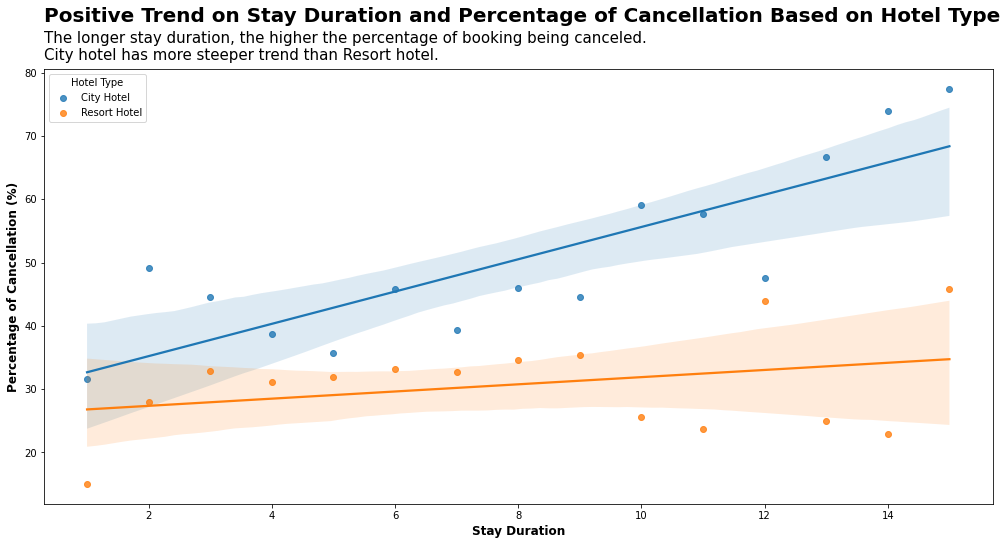

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize = (17,8))
sns.regplot(data = df3_gb_pivot[df3_gb_pivot['hotel']=='City Hotel'], x = 'stay_duration', y = 'percentage_of_cancellation', label = 'City Hotel')
sns.regplot(data = df3_gb_pivot[df3_gb_pivot['hotel']=='Resort Hotel'],x ='stay_duration',y ='percentage_of_cancellation', label = 'Resort Hotel')

# set title, caption, and legend
plt.text(x= 0.3, y= 88, s='Positive Trend on Stay Duration and Percentage of Cancellation Based on Hotel Type',fontsize= 20, fontweight= 'bold') 
plt.text(x = 0.3, y = 82, s = 'The longer stay duration, the higher the percentage of booking being canceled.\n'
         'City hotel has more steeper trend than Resort hotel.', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(title = 'Hotel Type')

# set label
plt.xlabel('Stay Duration',fontsize=12, fontweight = 'bold')
plt.ylabel('Percentage of Cancellation (%)',fontsize=12, fontweight = 'bold')

plt.show()
plt.tight_layout()
plt.savefig('CancelRate.png', dpi = 200);


**Interpretasi :** 
1. Semakin lama durasi menginap maka persentase pembatalan juga semakin besar.
2. Persentase pembatalan pada City hotel lebih besar daripada Resort hotel.

# Impact Analysis of Lead Time on Bookings Hotel Cancellation Rate

In [58]:
df4 = df1.copy()

## Kategorisasi Jarak Waktu Pemesanan

In [59]:
df4['lead_time'].value_counts()

0      5761
1      3279
2      1990
3      1738
4      1645
       ... 
387       1
400       1
370       1
435       1
463       1
Name: lead_time, Length: 478, dtype: int64

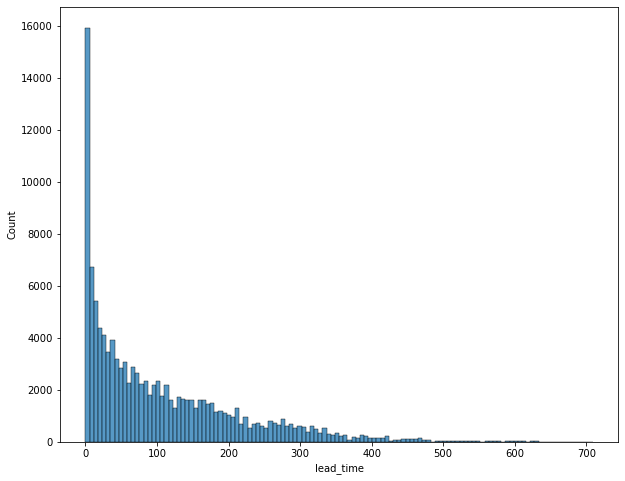

In [60]:
# cek distribusi lead_time
plt.figure(figsize=(10,8))
sns.histplot(x = 'lead_time', data = df4)
plt.show()

In [61]:
df4['lead_time'].describe()

count    117182.000000
mean        105.052073
std         106.928988
min           0.000000
25%          19.000000
50%          71.000000
75%         162.000000
max         709.000000
Name: lead_time, dtype: float64

Pengamatan :
1. Data skewed
2. Terlihat bahwa nilai maksimum sangat jauh dari nilai yang lain. Oleh karena itu kita akan mengelompokkan data-data yang nilainya lebih dari 365 akan dijadikan satu kelompok menjadi 366

In [62]:
df4['lead_time_new'] = np.where(df4['lead_time'] > 365,366,df4['lead_time'])
df4['lead_time_new'].value_counts()

0      5761
1      3279
366    3128
2      1990
3      1738
       ... 
345      14
347      11
361       9
354       8
362       2
Name: lead_time_new, Length: 367, dtype: int64

In [63]:
bins = list(np.arange(0, max(df4['lead_time_new'])+30,30))
bins

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]

In [64]:
label = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df4['lead_time_group'] = pd.cut(df4['lead_time_new'],bins=bins, include_lowest=True, labels=label)
df4['lead_time_group'].value_counts()

0-30       37210
30-60      16779
60-90      12462
90-120     10366
120-150     8078
150-180     7806
180-210     5610
210-240     4275
270-300     3401
360-390     3395
240-270     3373
300-330     2730
330-360     1697
Name: lead_time_group, dtype: int64

In [65]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117182 entries, 2 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           117182 non-null  object  
 1   is_canceled                     117182 non-null  object  
 2   lead_time                       117182 non-null  int64   
 3   arrival_date_year               117182 non-null  int64   
 4   arrival_date_month              117182 non-null  object  
 5   arrival_date_week_number        117182 non-null  int64   
 6   arrival_date_day_of_month       117182 non-null  int64   
 7   stays_in_weekend_nights         117182 non-null  int64   
 8   stays_in_weekdays_nights        117182 non-null  int64   
 9   adults                          117182 non-null  int64   
 10  children                        117182 non-null  int64   
 11  babies                          117182 non-null  int64   
 12  me

## Perbandingan Jumlah Pemesanan Hotel yang Dibatalkan Terhadap Jarak Waktu Pemesanan Untuk Setiap Jenis Hotel

In [66]:
df4_gb = df4.groupby(['hotel','is_canceled','lead_time_group']).agg({'lead_time_group': 'count'}).rename(columns={'lead_time_group':'total_booking'})
df4_gb_pivot = pd.pivot_table(df4_gb,index=['hotel','lead_time_group'],columns ='is_canceled',values='total_booking').reset_index()
df4_gb_pivot['percentage_of_cancellation'] = round(df4_gb_pivot[1]*100/(df4_gb_pivot[1]+df4_gb_pivot[0]),2)
df4_gb_pivot.columns = ['hotel','lead_time_group','not_canceled','canceled','percentage_of_cancellation']
df4_gb_pivot

,hotel,lead_time_group,not_canceled,canceled,percentage_of_cancellation
0,City Hotel,0-30,17263,5100,22.81
1,City Hotel,30-60,7182,4588,38.98
2,City Hotel,60-90,5149,3678,41.67
3,City Hotel,90-120,3922,3483,47.04
4,City Hotel,120-150,3035,2530,45.46
5,City Hotel,150-180,2431,2702,52.64
6,City Hotel,180-210,1774,1784,50.14
7,City Hotel,210-240,1215,1270,51.11
8,City Hotel,240-270,866,1226,58.60
9,City Hotel,270-300,648,1858,74.14


## Visualisasi Rasio Pembatalan Pesanan Terhadap Jarak Waktu Pemesanan Untuk Setiap Tipe Hotel

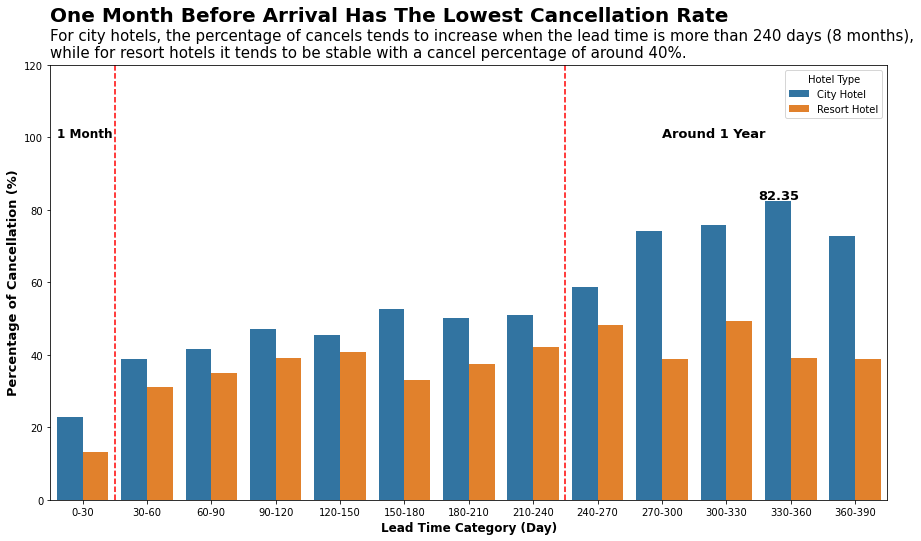

In [67]:
plt.figure(figsize = (15,8))
sns.barplot(data = df4_gb_pivot, x = 'lead_time_group', y = 'percentage_of_cancellation', hue = 'hotel')

# set title, caption, and legend
plt.text(x = -0.5, y = 132, s = 'One Month Before Arrival Has The Lowest Cancellation Rate', fontsize = 20, fontweight = 'bold') 
plt.text(x = -0.5, y = 122, s = 'For city hotels, the percentage of cancels tends to increase when the lead time is more than 240 days (8 months),\n'
         'while for resort hotels it tends to be stable with a cancel percentage of around 40%.', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.ylim(0,120)

# set label
plt.xlabel('Lead Time Category (Day)',fontsize=12, fontweight = 'bold')
plt.ylabel('Percentage of Cancellation (%)',fontsize=13, fontweight = 'bold')
plt.legend(title = 'Hotel Type')

# set 1 Month
plt.axvline(0.5, color='red', linestyle='--')
plt.text(x=-0.4,y=100,s='1 Month',fontsize=12, fontweight = 'bold')

#set Around 1 Year
plt.axvline(7.5, color='red', linestyle='--')
plt.text(x=9,y=100,s='Around 1 Year',fontsize=13, fontweight = 'bold')
plt.text(x=10.5,y=83,s='82.35',fontsize=13, fontweight = 'bold')

plt.show()


## Interpretasi

1. Persentase cancel paling rendah untuk kedua tipe hotel adalah dengan waktu pemesanan 1 bulan sebelum kedatangan.
2. Pada city hotel persentase cancel cenderung meningkat ketika waktu pemesanan melebihi 240 hari (8 bulan), bahkan pemesanan 330-360 hari sebelum kedatangan mencapai 82%. <br> 
Hal ini mungkin dikarenakan oleh beberapa faktor, yaitu :
   - jika pemesanan sudah dilakukan terlalu lama, kecenderungan untuk lupa kemungkinannya juga besar. Oleh karena itu perlu adanya reminder dari pihak hotel. Dimana jadwal/urusan yang tiba-tiba muncul di hari-hari yang mendekati tanggal kedatangan tidak bisa terprediksi sebelumnya.
   - rencana yang sudah dijadwalkan jauh-jauh hari, tiba-tiba batal karena ada hal yang lebih penting di tanggal yang sudah dipesan.
3. Pada Resort hotel cenderung stabil, dan persentase cancel berada di bawah 50% untuk setiap kategori jarak waktu pemesanan.